# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.656683e+01     1.361511e+01
 * time: 0.0015380382537841797
     1     3.508650e+01     9.646039e+00
 * time: 0.005667209625244141
     2     2.690473e+01     4.460077e+00
 * time: 0.011766195297241211
     3     2.252148e+01     3.157057e+00
 * time: 0.017022132873535156
     4     2.017187e+01     1.962052e+00
 * time: 0.02242898941040039
     5     1.991236e+01     3.702669e+00
 * time: 0.027047157287597656
     6     1.946156e+01     3.292525e+00
 * time: 0.03173398971557617
     7     1.903698e+01     2.374810e+00
 * time: 0.036245107650756836
     8     1.863135e+01     2.241654e+00
 * time: 0.04065704345703125
     9     1.806267e+01     1.626521e+00
 * time: 0.045361995697021484
    10     1.772496e+01     1.174389e+00
 * time: 0.07189702987670898
    11     1.757930e+01     6.005460e-01
 * time: 0.07543206214904785
    12     1.754165e+01     8.939291e-01
 * time: 0.07821798324584961
    13     1.747716e+01     6.695211e-01


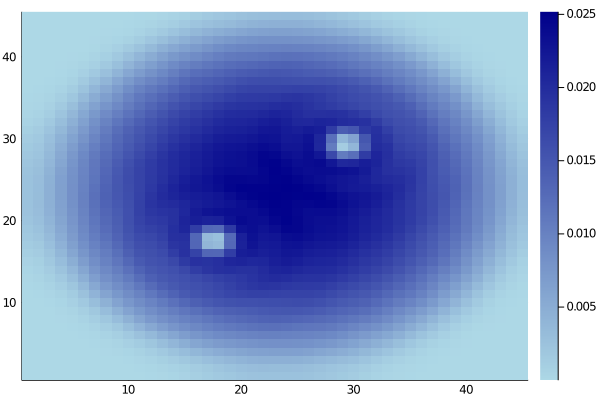

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)